In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np

In [8]:
url = 'res/uber.xlsx'
xls = pd.ExcelFile(url)
df1 = pd.read_excel(xls, 'Copyright')
df2 = pd.read_excel(xls, 'Data Dictionary')
df3 = pd.read_excel(xls, 'Switchbacks')

display(df1.head())
display(df2.head(14))
display(df3.head())

,Innovation at Uber: The Launch of Express POOL,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Harvard Business School Case 619-003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Courseware: 619-702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"REV: August 6, 2020",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,This courseware was prepared solely as the ba...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Data Dictionary,Unnamed: 1,Unnamed: 2
0,"""Switchbacks"" Tab",NaN,NaN
1,Variable,Type,Definition
2,city_id,String,Location where the experiment took place. In t...
3,period_start,Date,Start date and time for the 160-minute time pe...
4,wait_time,String,"This variable takes on two possible values: ""2..."
5,treat,Boolean,"This variable takes on two possible values: ""T..."
6,commute,Boolean,"This variable takes on two possible values: ""T..."
7,trips_pool,Numeric,Total number of POOL trips completed in the cu...
8,trips_express,Numeric,Total number of Express POOL trips completed i...
9,rider_cancellations,Numeric,Total number of requested trips that were canc...


,city_id,period_start,wait_time,treat,commute,trips_pool,trips_express,rider_cancellations,total_driver_payout,total_matches,total_double_matches
0,Boston,2018-02-19 07:00:00,2 mins,False,True,1415,3245,256,34458.411634,3372,1476
1,Boston,2018-02-19 09:40:00,5 mins,True,False,1461,2363,203,29764.349821,2288,1275
2,Boston,2018-02-19 12:20:00,2 mins,False,False,1362,2184,118,27437.367363,2283,962
3,Boston,2018-02-19 15:00:00,5 mins,True,True,1984,3584,355,44995.452993,4035,2021
4,Boston,2018-02-19 17:40:00,2 mins,False,False,1371,2580,181,27583.955295,2200,979


## Questions

### 1. What is the effect of extending the waiting time from 2  to 5 min on the total of completed trips / proportion of trips correclty matched / driver's earnings?

### 2. From a quantitative point of view, what would you recommend to Stock? Should he increase the waiting time in the 6 cities? ¿When does the increment should be applied?

### 3. Evaluate the Express project: what was done right by Uber? What could have improved?

In [11]:
wait2 = df3[df3['wait_time'].str.contains('2')]
wait2

,city_id,period_start,wait_time,treat,commute,trips_pool,trips_express,rider_cancellations,total_driver_payout,total_matches,total_double_matches
0,Boston,2018-02-19 07:00:00,2 mins,False,True,1415,3245,256,34458.411634,3372,1476
2,Boston,2018-02-19 12:20:00,2 mins,False,False,1362,2184,118,27437.367363,2283,962
4,Boston,2018-02-19 17:40:00,2 mins,False,False,1371,2580,181,27583.955295,2200,979
6,Boston,2018-02-19 23:00:00,2 mins,False,False,1216,2543,103,29642.905668,2600,1406
8,Boston,2018-02-20 04:20:00,2 mins,False,False,1248,2481,131,23238.946288,2623,1059
...,...,...,...,...,...,...,...,...,...,...,...
116,Boston,2018-03-04 04:20:00,2 mins,False,False,1156,2254,132,31600.013141,2177,1304
118,Boston,2018-03-04 09:40:00,2 mins,False,False,1151,2793,193,29426.909594,2732,1752
120,Boston,2018-03-04 15:00:00,2 mins,False,False,1393,2301,161,28015.257606,2179,882
122,Boston,2018-03-04 20:20:00,2 mins,False,False,1303,2334,158,27072.606354,2164,940


In [13]:
wait5 = df3[df3['wait_time'].str.contains('5')]
wait5

,city_id,period_start,wait_time,treat,commute,trips_pool,trips_express,rider_cancellations,total_driver_payout,total_matches,total_double_matches
1,Boston,2018-02-19 09:40:00,5 mins,True,False,1461,2363,203,29764.349821,2288,1275
3,Boston,2018-02-19 15:00:00,5 mins,True,True,1984,3584,355,44995.452993,4035,2021
5,Boston,2018-02-19 20:20:00,5 mins,True,False,1401,2022,135,23888.110848,2066,1062
7,Boston,2018-02-20 01:40:00,5 mins,True,False,1691,2018,150,25794.869920,1918,1281
9,Boston,2018-02-20 07:00:00,5 mins,True,True,1815,2539,284,34047.473898,2624,1565
...,...,...,...,...,...,...,...,...,...,...,...
117,Boston,2018-03-04 07:00:00,5 mins,True,False,1515,2059,129,22995.159002,1828,1063
119,Boston,2018-03-04 12:20:00,5 mins,True,False,1818,1970,204,24339.583561,1974,1510
121,Boston,2018-03-04 17:40:00,5 mins,True,False,1718,2655,173,28288.521151,2600,1361
123,Boston,2018-03-04 23:00:00,5 mins,True,False,1157,2359,154,23525.115952,2323,1473


In [70]:
wait = [wait2, wait5]
cols = ['trips_express', 'trips_pool', 'rider_cancellations']
d = {c: [] for c in cols}
for i in range(2):
    for c in cols:
        val = wait[i][c].sum()
        d[c].append(val)
d

{'trips_express': [164535, 152421],
 'trips_pool': [85385, 92024],
 'rider_cancellations': [10417, 11978]}

In [85]:
diffs = []
factor = 1000
for key, val in d.items():
    diffs.append([abs(val[0] - val[1])/factor, val.index(min(val))])
diffs

[[12.114, 1], [6.639, 0], [1.561, 0]]

In [72]:
stats = list(d.values())
factor = 1000
stats = [list(np.array(s)/factor) for s in stats]
stats

[[164.535, 152.421], [85.385, 92.024], [10.417, 11.978]]

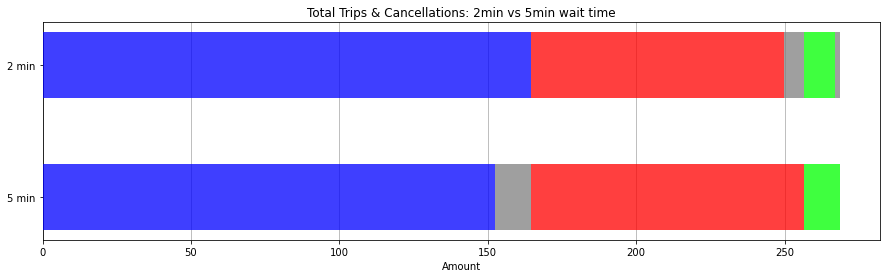

In [116]:
from matplotlib import cm
cmap1 = cm.get_cmap("tab20b")
'''
top = 
bottom = 
deciles = int((top - bottom) / 10)
'''

xs = list(np.arange(0, len(stats[0])))
colors = [(0,0,1,0.5), (1,0,0,0.5), (0,1,0,0.5), (0.5, 0.5, 0.5, 0.5)]
labels = ['Pool', 'Express', 'Cancellations']
fig2 = plt.figure(figsize=(15, 4))
ax2 = fig2.add_subplot(1,1,1)

lower = [0, 0]

for t in range(len(stats)+1):
    
    if t > 0:
        lower_vals = [max(stats[s]) for s in range(t-1, -1, -1)]
        val = sum(lower_vals)
        lower = [val, val]
        height = abs(min(stats[t-1])- max(stats[t-1]))
        ax2.barh(np.array([stats[t-1].index(min(stats[t-1]))]), height, height=width, zorder=3, left=lower - height, color=colors[-1])
    if t == len(stats):
        break
    for v in range(len(stats[t])):
        
        ax2.barh(np.array(xs[v]), stats[t][v], height=width, zorder=3, left=lower, color=colors[t])
    
ax2.set_yticks(xs)
ax2.set_yticklabels(['2 min', '5 min'])
ax2.grid(zorder=0, axis='x')
#plt.ylim((bottom, top))
#plt.yticks([i * deciles + bottom for i in range(deciles*2)])
ax2.set_title("Total Trips & Cancellations: 2min vs 5min wait time")
plt.xlabel("Amount")
plt.gca().invert_yaxis()
plt.show()
fig2.tight_layout()